In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, confusion_matrix, classification_report 
from sklearn.metrics import make_scorer, fbeta_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn .model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import pickle
from imblearn.combine import SMOTETomek
from collections import Counter  #for count the 1/0
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('Telecom.csv')

In [3]:
data.head()

,Unnamed: 0,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,29.85,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,56.95,0,3,0,0,...,0,1,0,0,0,1,0,0,0,1
2,2,0,0,0,1,53.85,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,42.30,0,4,0,0,...,0,1,1,0,0,1,0,0,0,0
4,4,0,0,0,1,70.70,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
#variables for training
X = data.drop(['Churn', 'Unnamed: 0'], axis = 1)
y = data['Churn']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [6]:
from imblearn.combine import SMOTETomek
from collections import Counter  #for count the 1/0

In [7]:
os=SMOTETomek(0.8)
X_train_Ov,y_train_Ov=os.fit_sample(X_train,y_train)
print("The num of classes before fit {}".format(Counter(y_train)))
print("the num of classes after fit {}".format(Counter(y_train_Ov)))

The num of classes before fit Counter({0: 4125, 1: 1500})
the num of classes after fit Counter({0: 3976, 1: 3151})


C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [8]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20, 30],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20,50,100, 200, 300]
}
# Create a based model
rf_C = RandomForestClassifier()
# Instantiate the grid search model
RF_model = GridSearchCV(estimator = rf_C, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
RF_model .fit(X_train_Ov,y_train_Ov)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.3min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20, 30],
                         'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [20, 50, 100, 200, 300]},
             verbose=2)

In [9]:
RF_model.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [30]:
rf_model=RandomForestClassifier(class_weight={0:1, 1:3}, max_depth = 10,random_state=1,
                                  n_estimators=200, oob_score=True, min_samples_leaf=10, min_samples_split=8)

In [31]:
rf_model .fit(X_train_Ov,y_train_Ov)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       min_samples_leaf=10, min_samples_split=8,
                       n_estimators=200, oob_score=True, random_state=1)

In [36]:
y_pred=rf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[644 394]
 [ 43 326]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      1038
           1       0.45      0.88      0.60       369

    accuracy                           0.69      1407
   macro avg       0.70      0.75      0.67      1407
weighted avg       0.81      0.69      0.71      1407

0.7519463633942699


In [37]:
y_prob = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_prob[:,1])))

RF test roc-auc: 0.8371137950300506


Text(0.5, 1.0, '2-class Precision-Recall curve')

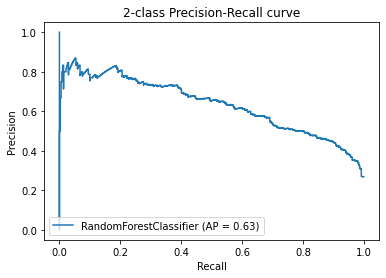

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rf_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')
                   

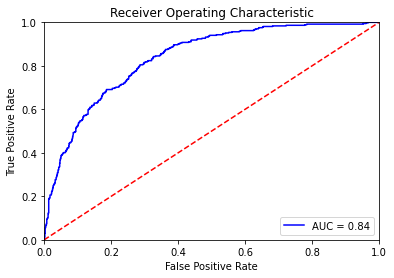

In [39]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
#Save model
pickle.dump(rf_model, open('model.pkl','wb'))